***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [4]:
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [5]:
sorted(df['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(df['Sexo'].unique())

[0, 1]

In [7]:
sorted(df['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [8]:
print(f"De {df['Idade'].min()} até {df['Idade'].max()} anos")

De 13 até 99 anos


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [9]:
print(f"De {df['Altura'].min()} até {df['Altura'].max()} metros")

De 1.339244614 até 2.028496765 metros


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [10]:
df['Sexo'].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [11]:
df['Sexo'].value_counts(normalize=True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [12]:
sex_frequency = df['Sexo'].value_counts()

In [13]:
sex_percentage = df['Sexo'].value_counts(normalize=True) * 100

In [14]:
sex_frequency_distribution = pd.DataFrame({'Frequência': sex_frequency, 'Porcentagem (%)': sex_percentage})

In [15]:
sex_frequency_distribution

,Frequência,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [16]:
sex_frequency_distribution.rename(index={0:'Masculino',1:'Feminino'},inplace=True)
sex_frequency_distribution.rename_axis('Sexo',axis='columns',inplace=True)

In [17]:
sex_frequency_distribution

Sexo,Frequência,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [18]:
sex = {
    0:'Masculino',
    1:'Feminino'
}

races = {
    0:'Indigena',
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda',
    9:'Sem declaração'
}

In [19]:
frequency_sex_races = pd.crosstab(df['Sexo'],df['Cor'])
frequency_sex_races.rename(index=sex,inplace=True)
frequency_sex_races.rename(columns=races,inplace=True)
frequency_sex_races

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [20]:
percentage_sex_races = pd.crosstab(df['Sexo'],df['Cor'],normalize=True) * 100
percentage_sex_races.rename(index=sex,inplace=True)
percentage_sex_races.rename(columns=races,inplace=True)
percentage_sex_races

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [21]:
percentage_sex_races = pd.crosstab(df['Sexo'],df['Cor'],aggfunc='mean',values=df['Renda'])
percentage_sex_races.rename(index=sex,inplace=True)
percentage_sex_races.rename(columns=races,inplace=True)
percentage_sex_races

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [22]:
df['Renda'].min()

0

In [23]:
df['Renda'].max()

200000

In [24]:
classes = [df['Renda'].min(),1576,3152,7880,15760,df['Renda'].max()]

In [25]:
labels = ['E','D','C','B','A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [26]:
rent_frequency = pd.cut(x=df['Renda'],bins=classes,labels=labels,include_lowest=True).value_counts()
rent_frequency

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [27]:
rent_percentage = pd.cut(x=df['Renda'],bins=classes,labels=labels,include_lowest=True).value_counts(normalize=True) * 100
rent_percentage

Renda
E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

In [28]:
rent_frequency_distribution = pd.DataFrame({'Frequência': rent_frequency,'Porcentagem (%)': rent_percentage})
rent_frequency_distribution

,Frequência,Porcentagem (%)
Renda,,
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [29]:
rent_frequency_distribution.sort_index(ascending=False)

,Frequência,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [30]:
classes = [df['Altura'].min(), 1.65, 1.75, df['Altura'].max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

height_frequency = pd.cut(x = df['Altura'],bins=classes,labels=labels,include_lowest = True).value_counts()
height_percentage = pd.cut(x=df['Altura'],bins=classes,labels=labels,include_lowest = True).value_counts(normalize = True) * 100
height_frequency_distribution = pd.DataFrame({'Frequência': height_frequency, 'Porcentagem (%)': height_percentage})
height_frequency_distribution.rename_axis('Estaturas', axis= 'columns', inplace = True)
height_frequency_distribution.sort_index(ascending = True, inplace = True)
height_frequency_distribution

Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [31]:
n = df.shape[0]
n

76840

In [32]:
k = 1 + (10/3) * np.log10(n)

In [33]:
k

17.285291187298853

In [34]:
k = int(k.round(0))
k

17

### Passo 2 - Criar a tabela de frequências

In [35]:
rent_frequency_classes = pd.cut(x=df['Renda'],bins=k,include_lowest=True).value_counts(sort=False)
rent_frequency_classes

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [36]:
rent_percentage_classes = pd.cut(x=df['Renda'],bins=k,include_lowest=True).value_counts(sort=False,normalize=True)*100
rent_percentage_classes

Renda
(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

In [37]:
rent_frequency_distribution_classes = pd.DataFrame({'Frequência': rent_frequency_classes,'Porcentagem (%)': rent_percentage_classes})
rent_frequency_distribution_classes

,Frequência,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


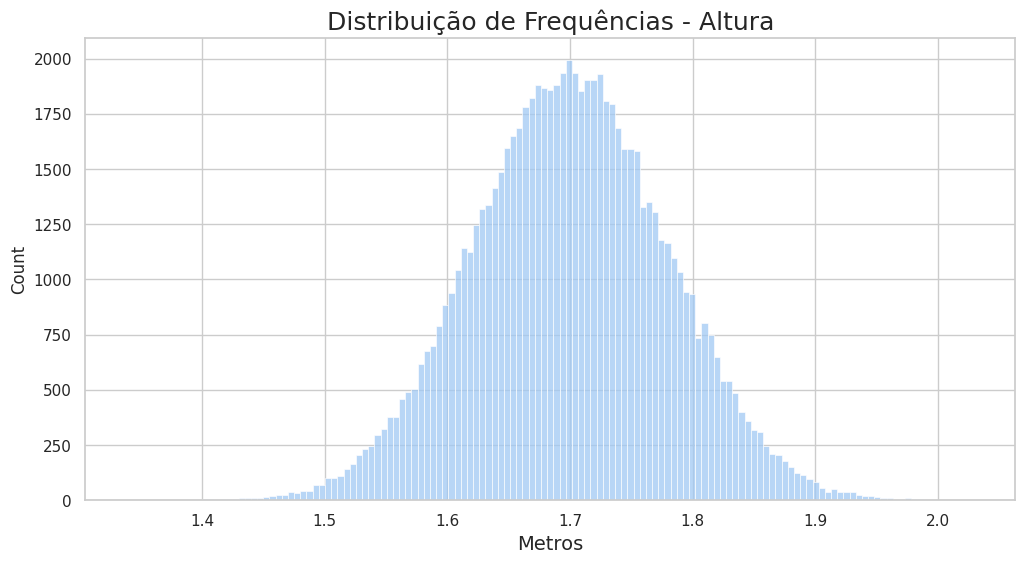

In [38]:
plt.figure(figsize=(12,6))
plt.title('Distribuição de Frequências - Altura',fontsize=18)
sns.histplot(df['Altura'],kde=False)
plt.xlabel('Metros',fontsize=14)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


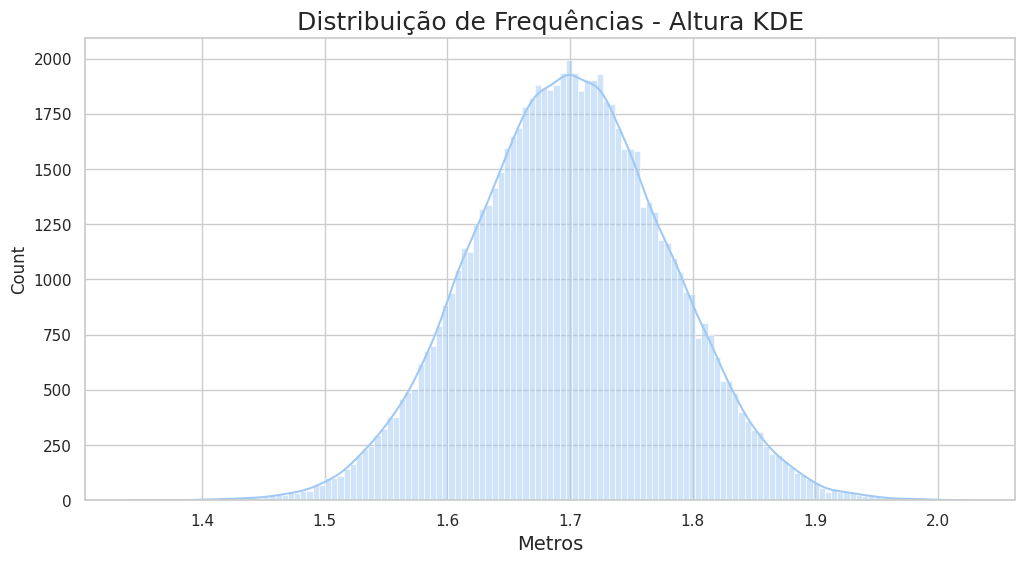

In [39]:
plt.figure(figsize=(12,6))
plt.title('Distribuição de Frequências - Altura KDE',fontsize=18)
sns.histplot(df['Altura'],kde=True)
plt.xlabel('Metros',fontsize=14)
plt.show()

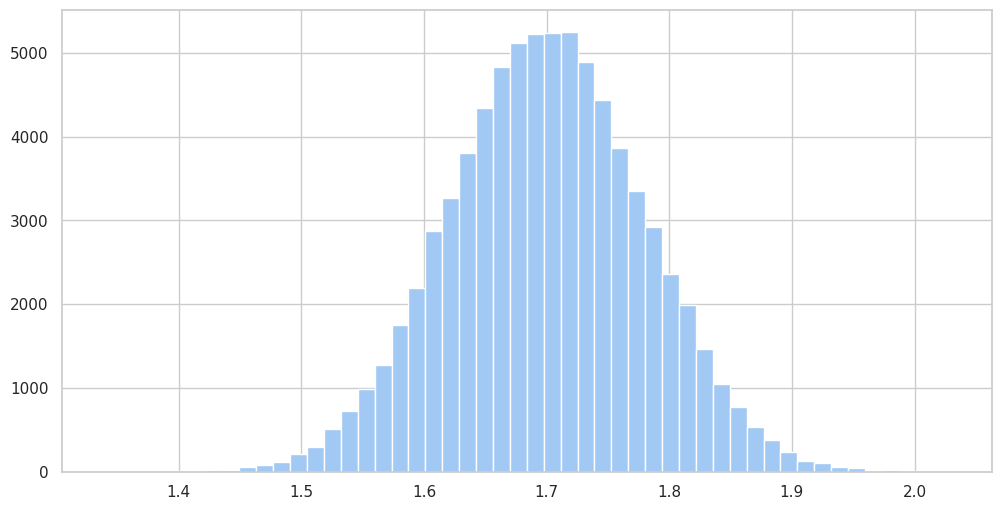

In [40]:
df['Altura'].hist(bins=50,figsize=(12,6))
plt.show()

In [41]:
rent_frequency_distribution

,Frequência,Porcentagem (%)
Renda,,
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


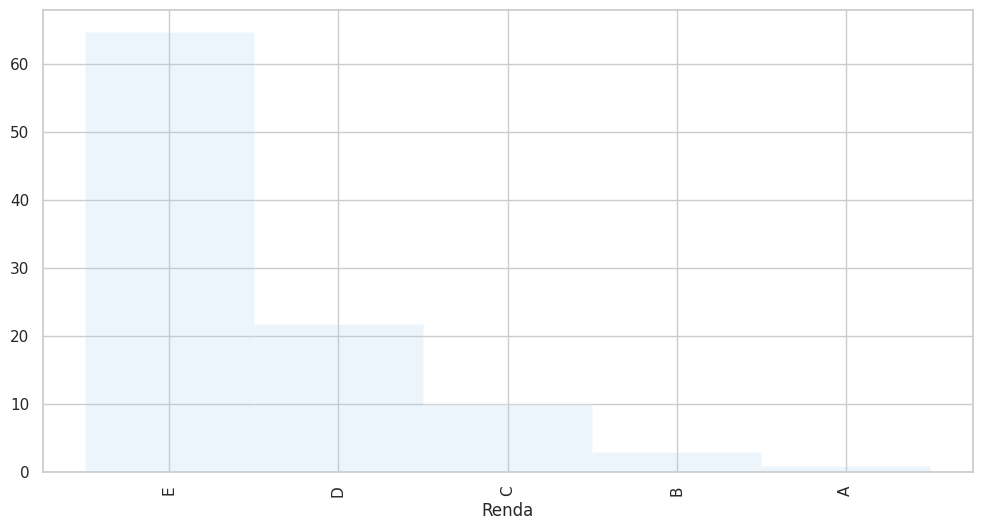

In [42]:
rent_frequency_distribution['Porcentagem (%)'].plot.bar(width=1,figsize=(12,6),alpha=0.2)
plt.show()

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

In [43]:
sub_df = pd.DataFrame({
    'Fulano':[8,10,4,8,6,10,8],
    'Beltrano':[10,2,0.5,1,3,9.5,10],
    'Siclano':[7.5,8,7,8,8,8.5,7]
}, index=['Matemática','Português','Inglês','Geografica','História','Física','Química'])
sub_df.rename_axis('Matérias',axis='columns',inplace=True)
sub_df

Matérias,Fulano,Beltrano,Siclano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografica,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [44]:
sub_df['Fulano'].mean()

7.714285714285714

In [45]:
df['Renda'].mean()

2000.3831988547631

In [46]:
df.groupby('Sexo')['Renda'].mean().rename(index=sex)

Sexo
Masculino    2192.441596
Feminino     1566.847393
Name: Renda, dtype: float64

In [47]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset.groupby('Sexo')['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [48]:
notes_fulano = sub_df['Fulano']
notes_fulano

Matemática     8
Português     10
Inglês         4
Geografica     8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [49]:
notes_fulano = notes_fulano.sort_values()
notes_fulano

Inglês         4
História       6
Matemática     8
Geografica     8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [50]:
notes_fulano = notes_fulano.reset_index()
notes_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografica,8
4,Química,8
5,Português,10
6,Física,10


In [51]:
n = notes_fulano.shape[0]
n

7

In [52]:
median_element = (n+1)/2
median_element

4.0

In [53]:
notes_fulano.loc[median_element-1]

index     Geografica
Fulano             8
Name: 3, dtype: object

In [54]:
sub_df['Fulano'].median()

8.0

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [55]:
notes_beltrano = sub_df['Beltrano'].sample(6,random_state=101)
notes_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [56]:
notes_beltrano.median()

6.25

### Obtendo a mediana em nosso dataset

In [57]:
df['Renda'].median()

1200.0

In [58]:
df['Renda'].quantile()

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [59]:
sub_df

Matérias,Fulano,Beltrano,Siclano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografica,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [60]:
sub_df.mode()

Matérias,Fulano,Beltrano,Siclano
0,8,10.0,8.0


In [61]:
example = pd.Series([1,2,2,3,4,4,5,6,6])
example

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

In [62]:
example.mode()

0    2
1    4
2    6
dtype: int64

### Obtendo a moda em nosso dataset

In [63]:
df['Renda'].mode()

0    788
Name: Renda, dtype: int64

In [64]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


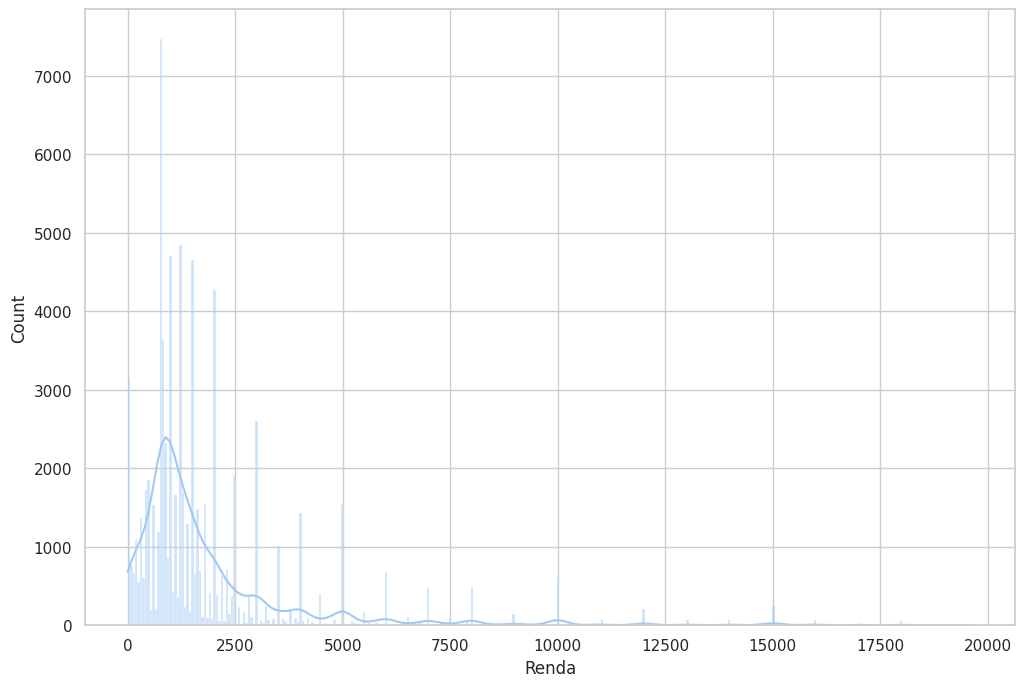

In [65]:
plt.figure(figsize=(12,8))
sns.histplot(df.query('Renda < 20000')['Renda'],kde=True)
plt.show()

In [66]:
rent_mode = df['Renda'].mode()[0]
rent_mode

788

In [67]:
rent_mean = df['Renda'].mean()
rent_mean

2000.3831988547631

In [68]:
rent_median = df['Renda'].median()
rent_median

1200.0

In [69]:
rent_mode < rent_median < rent_mean

True

***

### Avaliando a variável ALTURA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


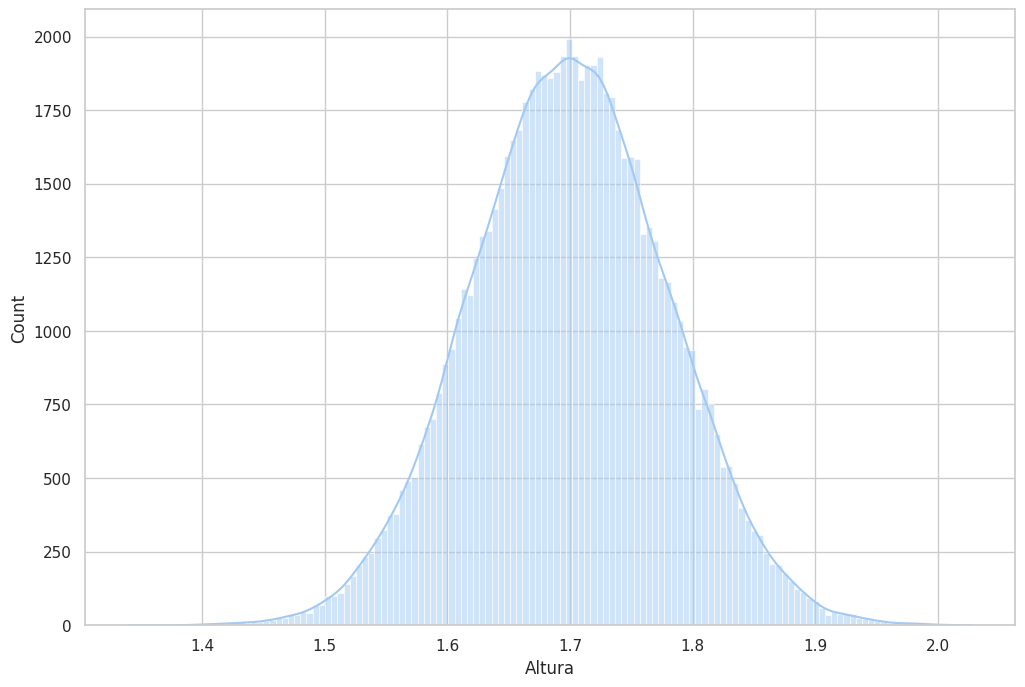

In [70]:
plt.figure(figsize=(12,8))
sns.histplot(df['Altura'],kde=True)
plt.show()

In [71]:
height_mode = df['Altura'].mode()[0]
height_mode

1.56812756

In [72]:
height_median = df['Altura'].median()
height_median

1.6993247325

In [73]:
height_mean = df['Altura'].mean()
height_mean

1.6995124540575741

***

### Avaliando a variável ANOS DE ESTUDO

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


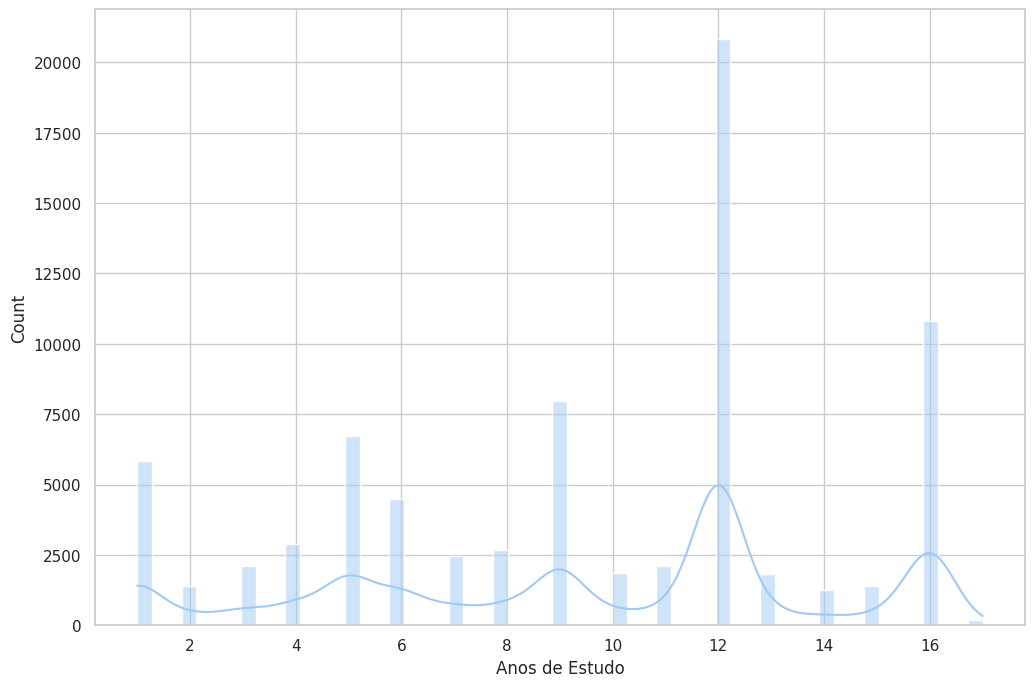

In [74]:
plt.figure(figsize=(12,8))
sns.histplot(df['Anos de Estudo'],kde=True)
plt.show()

In [75]:
years_study_mode = df['Anos de Estudo'].mode()[0]
years_study_mode

12

In [76]:
years_study_median = df['Anos de Estudo'].median()
years_study_median

11.0

In [77]:
years_study_mean = df['Anos de Estudo'].mean()
years_study_mean

9.469664237376367

In [78]:
years_study_mode > years_study_median > years_study_mean

True

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [79]:
df['Renda'].quantile([0.25,0.5,0.75,1])

0.25       788.0
0.50      1200.0
0.75      2000.0
1.00    200000.0
Name: Renda, dtype: float64

In [80]:
[i / 10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [81]:
df['Renda'].quantile([i / 10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [82]:
df['Renda'].quantile([i / 100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


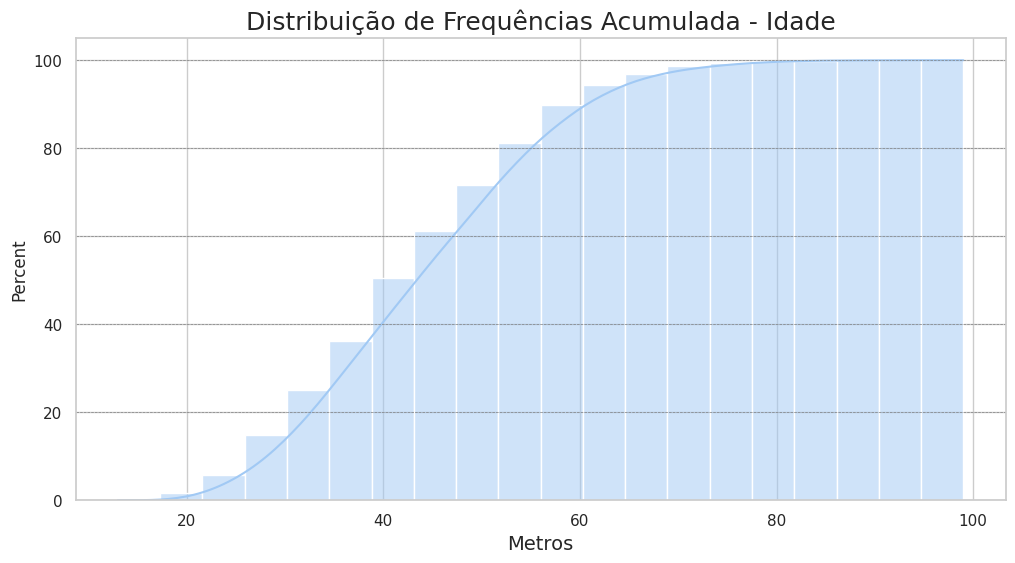

In [83]:
plt.figure(figsize=(12,6))
plt.title('Distribuição de Frequências Acumulada - Idade',fontsize=18)
sns.histplot(df['Idade'],cumulative=True,kde=True,stat='percent',bins=20)
for percent in range(0, 101, 20):
    plt.axhline(y=percent, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Metros',fontsize=14)
plt.show()

In [84]:
df['Idade'].quantile([i/10 for i in range (1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

In [85]:
df['Renda'].quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

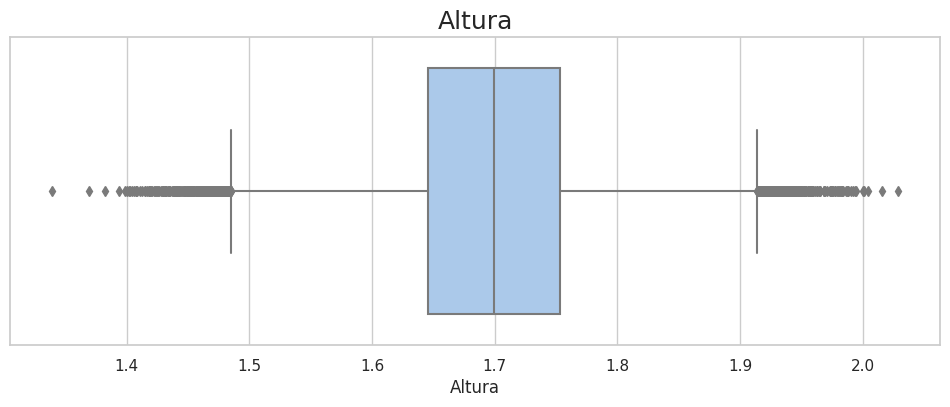

In [86]:
plt.figure(figsize=(12,4))
plt.title('Altura',fontsize=18)
sns.boxplot(x=df['Altura'])
plt.show()

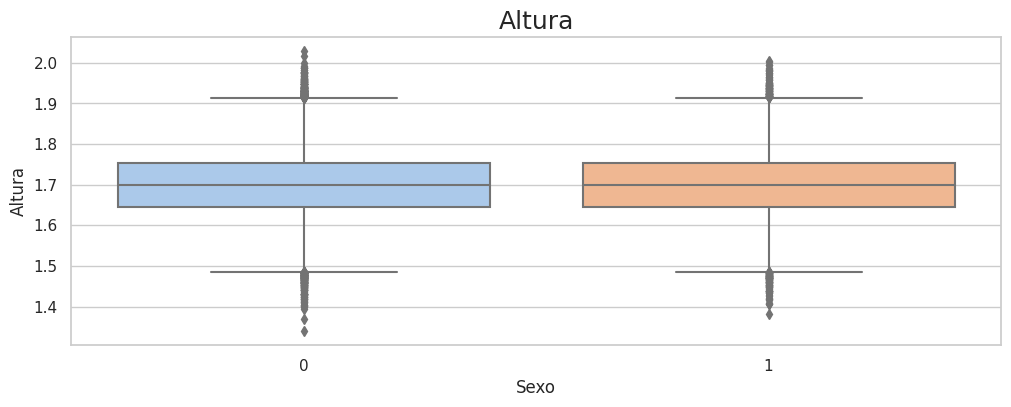

In [87]:
plt.figure(figsize=(12,4))
plt.title('Altura',fontsize=18)
sns.boxplot(data=df,y='Altura',x='Sexo')
plt.show()

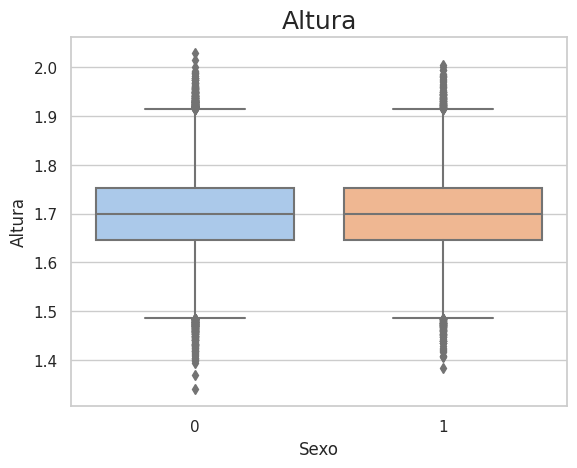

In [88]:
plt.title('Altura',fontsize=18)
sns.boxplot(df,y='Altura',x='Sexo')
plt.show()

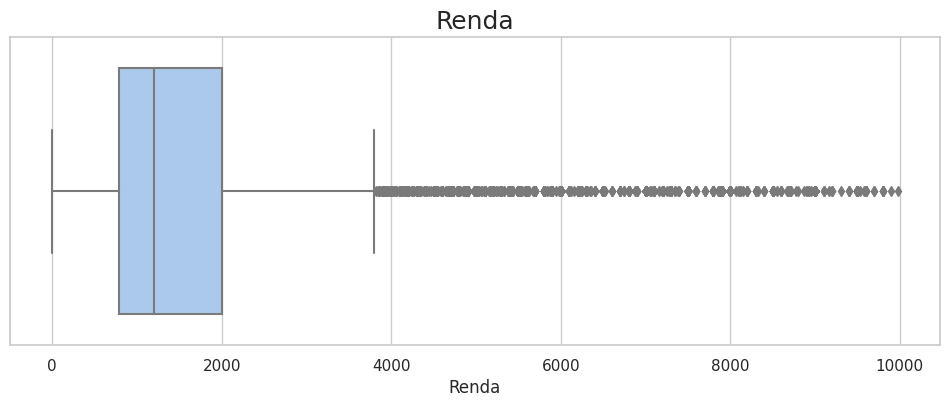

In [89]:
plt.figure(figsize=(12,4))
plt.title('Renda',fontsize=18)
sns.boxplot(x=df.query('Renda < 10000')['Renda'])
plt.show()

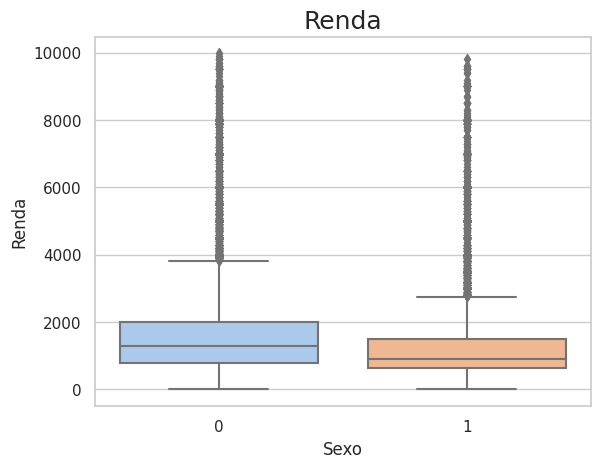

In [90]:
plt.title('Renda',fontsize=18)
sns.boxplot(data=df.query('Renda < 10000'),y='Renda',x='Sexo')
plt.show()

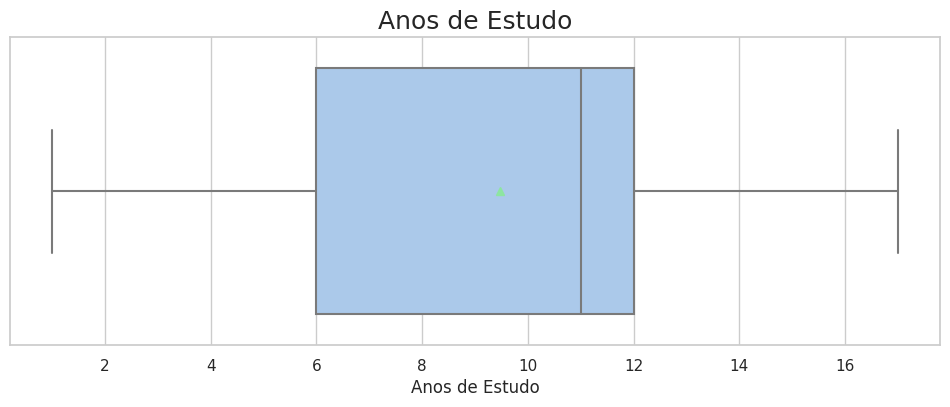

In [91]:
plt.figure(figsize=(12,4))
plt.title('Anos de Estudo',fontsize=18)
sns.boxplot(df,x='Anos de Estudo',showmeans=True)
plt.show()

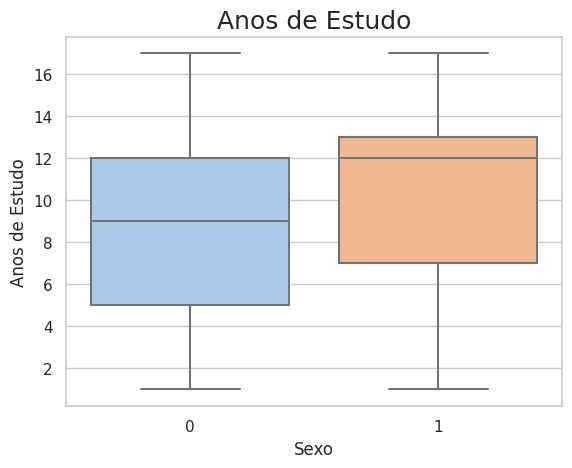

In [92]:
plt.title('Anos de Estudo',fontsize=18)
sns.boxplot(data=df,y='Anos de Estudo',x='Sexo')
plt.show()

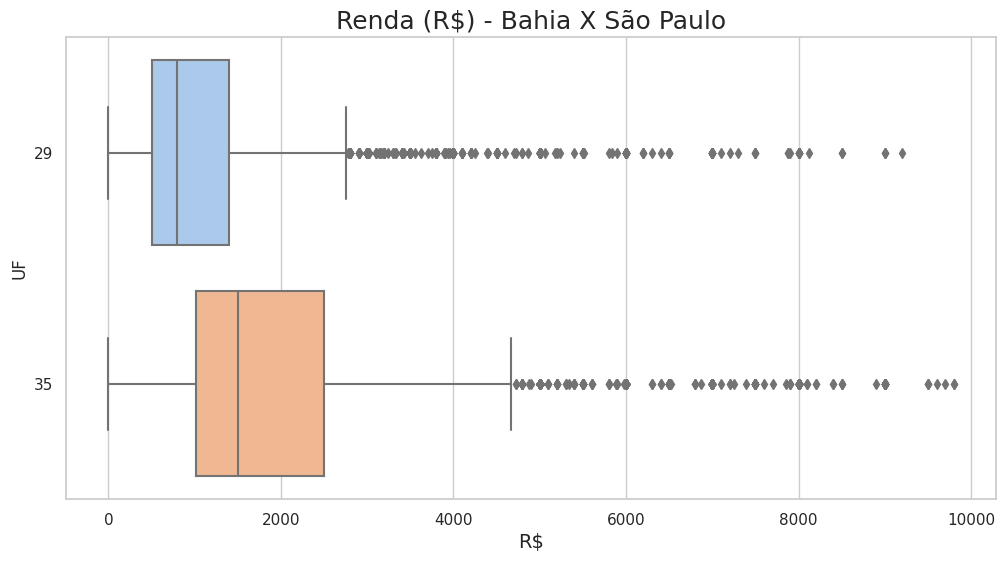

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Renda', y = 'UF', data = df.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')
plt.title('Renda (R$) - Bahia X São Paulo', fontsize=18)
plt.xlabel('R$', fontsize=14)
plt.show()

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [94]:
sub_df

Matérias,Fulano,Beltrano,Siclano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografica,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [95]:
sub_df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Siclano     7.714286
dtype: float64

In [96]:
sub_df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Siclano     8.0
dtype: float64

In [97]:
notes_fulano = sub_df[['Fulano']]
notes_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografica,8
História,6
Física,10
Química,8


In [98]:
notes_fulano_mean = notes_fulano.mean()[0]
notes_fulano_mean

/tmp/ipykernel_33/3032037869.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  notes_fulano_mean = notes_fulano.mean()[0]


7.714285714285714

In [99]:
notes_fulano['Desvio'] = notes_fulano['Fulano'] - notes_fulano_mean
notes_fulano

/tmp/ipykernel_33/3817635505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes_fulano['Desvio'] = notes_fulano['Fulano'] - notes_fulano_mean


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografica,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [101]:
notes_fulano['|Desvio|'] = notes_fulano['Desvio'].abs()
notes_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografica,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


/tmp/ipykernel_33/2323129466.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.vlines(x=i, ymin=notes_fulano_mean, ymax=notes_fulano['Fulano'][i],linestyles='dashed', color='gray', linewidth=2)


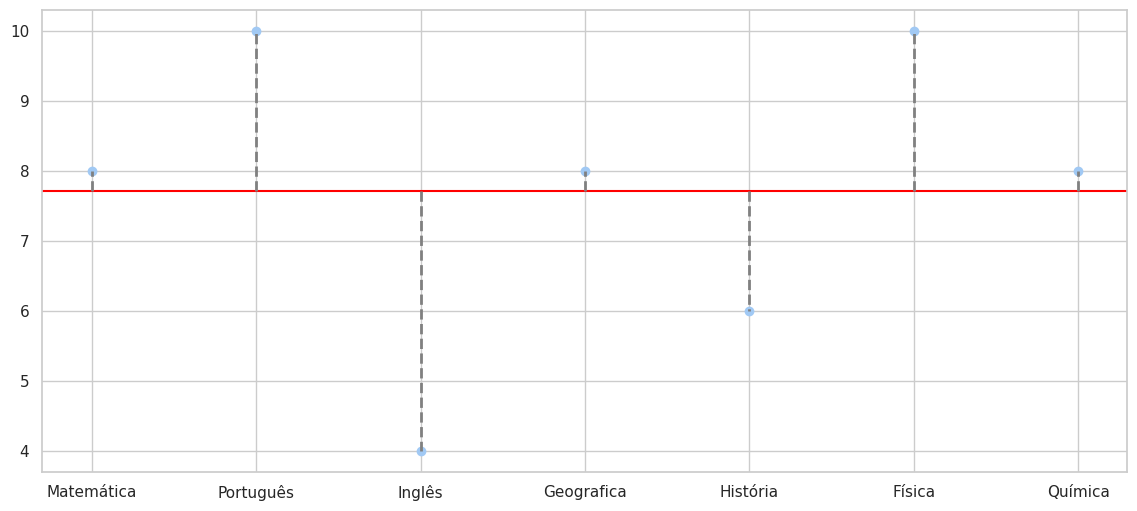

In [102]:
n = notes_fulano.shape[0]
plt.figure(figsize=(14,6))
ax = notes_fulano['Fulano'].plot(style='o')
plt.axhline(y=notes_fulano_mean, xmin=0, xmax=n-1, color='red')
for i in range(n):
    ax.vlines(x=i, ymin=notes_fulano_mean, ymax=notes_fulano['Fulano'][i],linestyles='dashed', color='gray', linewidth=2)
plt.show()

In [103]:
notes_fulano['|Desvio|'].mean()

1.5510204081632648

In [104]:
notes_fulano_absolute_mean_deviation = (notes_fulano['Fulano'] - notes_fulano['Fulano'].mean()).abs().mean()
notes_fulano_absolute_mean_deviation

1.5510204081632648

In [105]:
student_df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
student_df.rename_axis('Matérias', axis = 'columns', inplace = True)
student_df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [106]:
for student in student_df.columns:
    absolute_mean_deviation = (student_df[student] - student_df[student].mean()).abs().mean()
    print(f"Desvio médio absoluto do aluno {student}: {absolute_mean_deviation}")

Desvio médio absoluto do aluno Fulano: 1.5510204081632648
Desvio médio absoluto do aluno Sicrano: 0.4693877551020408


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [107]:
notes_fulano['(Desvio)²'] = notes_fulano['Desvio'].pow(2)
notes_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)²
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografica,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [109]:
notes_fulano['(Desvio)²'].sum() / (len(notes_fulano) - 1)

4.57142857142857

In [110]:
variance = notes_fulano['Fulano'].var()
variance

4.57142857142857

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [111]:
np.sqrt(variance)

2.1380899352993947

In [112]:
std_notes_fulano = notes_fulano['Fulano'].std()
std_notes_fulano

2.1380899352993947

In [113]:
sub_df

Matérias,Fulano,Beltrano,Siclano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografica,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [114]:
sub_df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Siclano     7.714286
dtype: float64

In [116]:
sub_df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Siclano     8.0
dtype: float64

In [117]:
sub_df.mode()

Matérias,Fulano,Beltrano,Siclano
0,8,10.0,8.0


In [118]:
sub_df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Siclano     0.566947
dtype: float64

In [120]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset.query('Sexo == "M"')['Idade'].std()

16.64531966249572